In [5]:
!pip install prophet pysan


  Using cached holidays-0.77-py3-none-any.whl.metadata (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.2 MB/s  0:00:02 eta 0:00:01
Using cached holidays-0.77-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [prophet]m5/6 [prophet]]


In [6]:
import pandas as pd
import prophet 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/orbinsunny/Documents/GitHub/Machine_Learning/Time_Series_Analysis/WEEK1/datasets/airline_passengers.csv')

In [9]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [11]:
df = df[:-1]

In [12]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


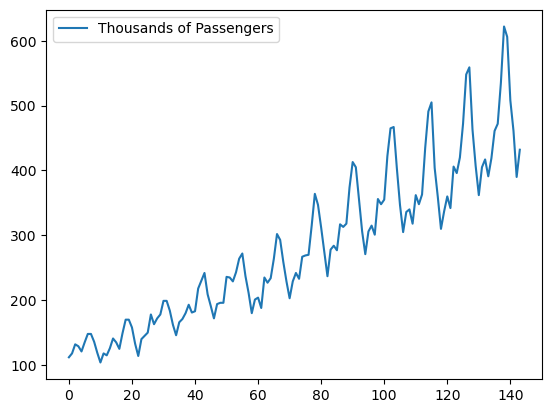

In [15]:
df.plot()
plt.show();

In [16]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [17]:
df['ds'] = pd.to_datetime(df['ds'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [20]:
from prophet import Prophet

dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 

In [21]:
# Initialize the Model
model = Prophet()
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)


09:33:22 - cmdstanpy - INFO - Chain [1] start processing
09:33:23 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [25]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)
prediction= model.predict(future_dates)

In [26]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.776428,58.185288,112.899873,107.776428,107.776428,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,0.0,0.0,0.0,86.413847
1,1949-02-01,109.911280,49.060209,108.298907,109.911280,109.911280,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,0.0,0.0,0.0,79.896119
2,1949-03-01,111.839534,82.948462,139.265083,111.839534,111.839534,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,0.0,0.0,0.0,111.364886
3,1949-04-01,113.974386,79.723753,136.215484,113.974386,113.974386,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,0.0,0.0,0.0,109.065588
4,1949-05-01,116.040373,84.143547,140.777309,116.040373,116.040373,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,0.0,0.0,0.0,112.430473


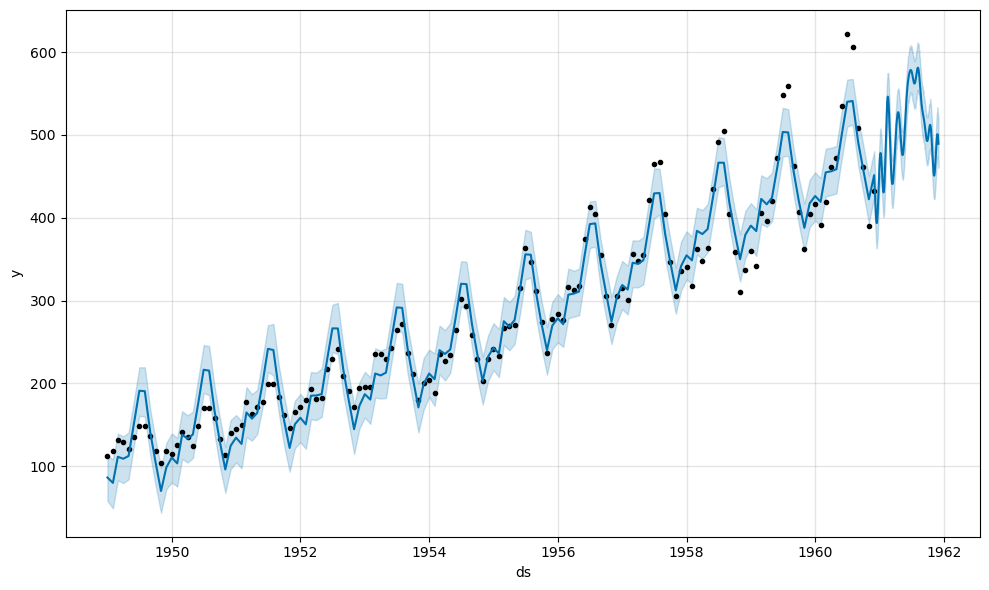

In [30]:
model.plot(prediction)
plt.show();

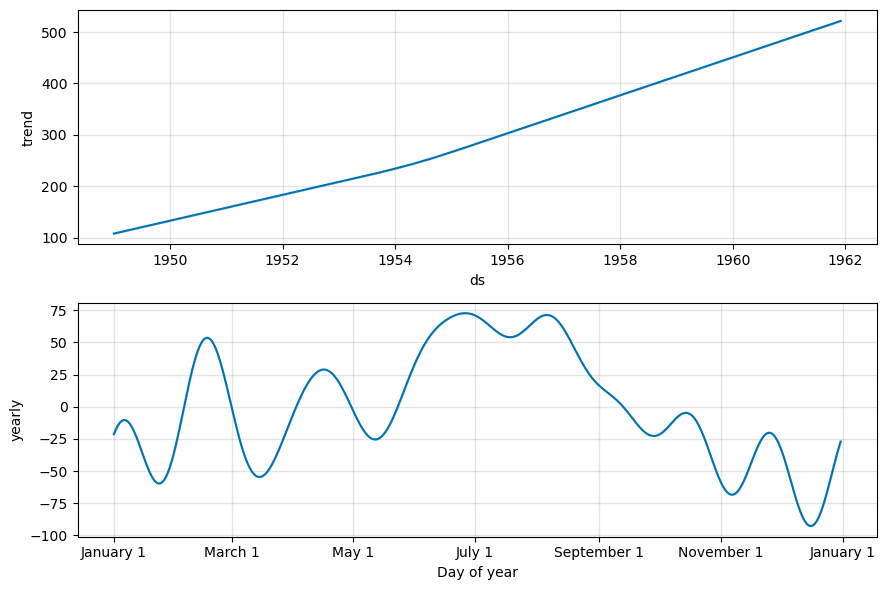

In [31]:
model.plot_components(prediction)

Time Series Analysis - Cross validation 

* 1960 - 1961 - Train set
* 1961 - 1962 - Test set
* 1962 - 1963 - Validation set

In [32]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

12:09:34 - cmdstanpy - INFO - Chain [1] start processing
12:09:46 - cmdstanpy - INFO - Chain [1] done processing
12:09:46 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:47 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:47 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:48 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:48 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1] done processing
12:09:49 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1] done processing
12:09:49 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.224549,156.932808,157.532235,150.0,1951-01-18
1,1951-03-01,169.122714,168.177935,170.092138,178.0,1951-01-18
2,1951-04-01,156.504735,154.645756,158.353190,163.0,1951-01-18
3,1951-05-01,142.204381,139.135086,145.110290,172.0,1951-01-18
4,1951-06-01,176.070428,171.803529,180.188991,178.0,1951-01-18


In [34]:
df_cv.shape

(228, 6)

In [33]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.996361,32.954459,25.802013,0.078130,0.073928,0.079188,0.227273
1,42 days,1013.218091,31.831087,25.248620,0.076989,0.073928,0.077721,0.181818
2,46 days,907.957456,30.132332,24.663440,0.078842,0.078980,0.078630,0.136364
3,47 days,1043.721662,32.306681,26.840833,0.082018,0.085537,0.082195,0.136364
4,48 days,1033.331185,32.145469,26.297951,0.080148,0.085537,0.080390,0.181818


In [35]:
df_p.shape

(170, 8)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


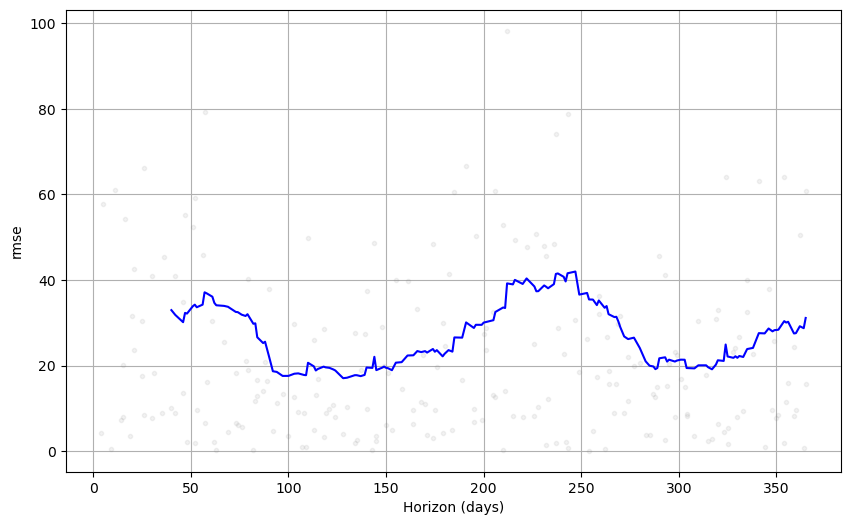

In [38]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show();